## Regresion Logistica

Estudiante: Karen Natalia Martinez Romero,
Grupo: 86

In [56]:
"""

Descripción de los atributos:
- age: edad en años
- sex: sexo (1 = masculino; 0 = femenino)
- cp: tipo de dolor en el pecho
  - Valor 0: angina típica
  - Valor 1: angina atípica
  - Valor 2: dolor no anginoso
  - Valor 3: asintomático
- trestbps: presión arterial en reposo (en mm Hg al ingreso al hospital)
- chol: colesterol sérico en mg/dl
- fbs: (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
- restecg: resultados del electrocardiograma en reposo
  - Valor 0: normal
  - Valor 1: anomalía en la onda ST-T (inversiones de onda T y/o elevación o depresión de ST > 0.05 mV)
  - Valor 2: posible o definida hipertrofia ventricular izquierda según los criterios de Estes
- thalach: frecuencia cardíaca máxima alcanzada
- exang: angina inducida por el ejercicio (1 = sí; 0 = no)
- oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo
- slope: pendiente del segmento ST en el ejercicio máximo
  - Valor 0: pendiente ascendente
  - Valor 1: plana
  - Valor 2: pendiente descendente
- ca: número de vasos principales (0-3) coloreados por fluoroscopia
- thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible
- condition: etiqueta del estado de la condición, 0 = sin enfermedad, 1 = enfermedad
"""

# Cargar las librerías necesarias
import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y el análisis de datos
import seaborn as sns  # Creación gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


'\n\nDescripción de los atributos:\n- age: edad en años\n- sex: sexo (1 = masculino; 0 = femenino)\n- cp: tipo de dolor en el pecho\n  - Valor 0: angina típica\n  - Valor 1: angina atípica\n  - Valor 2: dolor no anginoso\n  - Valor 3: asintomático\n- trestbps: presión arterial en reposo (en mm Hg al ingreso al hospital)\n- chol: colesterol sérico en mg/dl\n- fbs: (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)\n- restecg: resultados del electrocardiograma en reposo\n  - Valor 0: normal\n  - Valor 1: anomalía en la onda ST-T (inversiones de onda T y/o elevación o depresión de ST > 0.05 mV)\n  - Valor 2: posible o definida hipertrofia ventricular izquierda según los criterios de Estes\n- thalach: frecuencia cardíaca máxima alcanzada\n- exang: angina inducida por el ejercicio (1 = sí; 0 = no)\n- oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo\n- slope: pendiente del segmento ST en el ejercicio máximo\n  - Valor 0: pendiente ascendente\n  - Valor 1

In [4]:
# Cargar los datos
Datos = pd.read_csv(r'D:\Ingenieria de sistemas\Semestre 7\ANÁLISIS DE DATOS\Tarea 3\heart_cleveland_upload.csv')

In [6]:
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [32]:
# Identificacion de Datos faltantes y atipicos.
# Ver los datos nulos
print("Cantidad de registros con cero en Presión Arterial: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en Colesterol: ", Datos['chol'].isin([0]).sum())

Cantidad de registros con cero en Presión Arterial:  0
Cantidad de registros con cero en Colesterol:  0


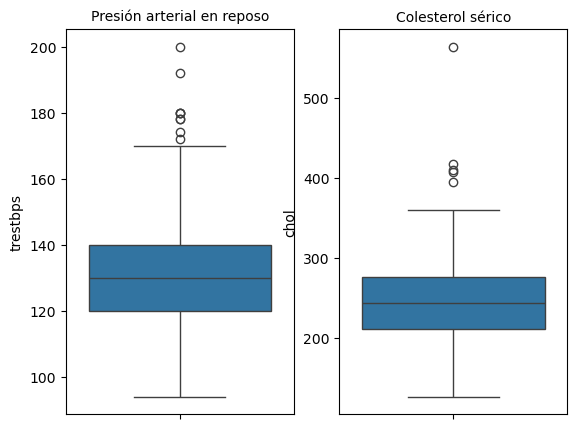

In [34]:
#Ver datos atipicos
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(Datos["trestbps"])
plt.title('Presión arterial en reposo', fontsize=10)
plt.subplot(1, 3, 2)
sns.boxplot(Datos["chol"])
plt.title('Colesterol sérico', fontsize=10)
plt.show()

In [36]:
nivel_minimo_trestbps = 80
nivel_maximo_trestbps = 200
nivel_minimo_chol = 100
nivel_maximo_chol = 400

# Contar datos atípicos de Presión Arterial
Total_Atipicos_trestbps = ((Datos['trestbps'] < nivel_minimo_trestbps) | (Datos['trestbps'] > nivel_maximo_trestbps)).sum()
print("El total de datos atípicos en Presión Arterial es {}".format(Total_Atipicos_trestbps))

# Contar datos atípicos de Colesterol
Total_Atipicos_chol = ((Datos['chol'] < nivel_minimo_chol) | (Datos['chol'] > nivel_maximo_chol)).sum()
print("El total de datos atípicos en Colesterol es {}".format(Total_Atipicos_chol))


El total de datos atípicos en Presión Arterial es 0
El total de datos atípicos en Colesterol es 4


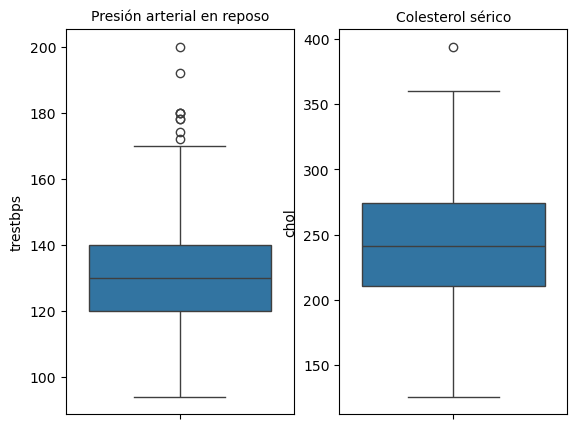

In [38]:
Datos = Datos[(Datos['trestbps'] <= nivel_maximo_trestbps) & (Datos['trestbps'] >= nivel_minimo_trestbps) &
              (Datos['chol'] <= nivel_maximo_chol) & (Datos['chol'] >= nivel_minimo_chol)]

#Ver datos
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(Datos["trestbps"])
plt.title('Presión arterial en reposo', fontsize=10)
plt.subplot(1, 3, 2)
sns.boxplot(Datos["chol"])
plt.title('Colesterol sérico', fontsize=10)
plt.show()

In [ ]:
Caracteristica de interes 
Enfermo de corazon - predecir si una persona puede tener problemas de corazon

In [44]:
#Ver como esta dividida la variable de interes 
Datos['condition'].value_counts()

condition
0    158
1    135
Name: count, dtype: int64

In [ ]:
 Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [108]:
# Porcentaje de datos para entrenamiento (train) = 80%, y para prueba (test) = 20%

# Se crean variables X e Y para almacenar la información del entrenamiento
X = Datos.drop('condition', axis=1)  # Se cargan los datos de train sin la columna de la etiqueta 'condition'
Y = Datos['condition']  # Se cargan los datos de la columna 'condition' como la variable objetivo

# La función train_test_split crea una división del conjunto de datos en dos bloques: uno de entrenamiento y otro de prueba (train y test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
7     61    1   0       134   234    0        0      145      0      2.6   
209   59    0   3       174   249    0        0      143      1      0.0   
24    71    0   1       160   302    0        0      162      0      0.4   
132   47    1   2       138   257    0        2      156      0      0.0   
26    66    1   1       160   246    0        0      120      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
172   65    1   3       120   177    0        0      140      0      0.4   
181   63    0   3       108   269    0        0      169      1      1.8   
194   61    1   3       138   166    0        2      125      1      3.6   
155   77    1   3       125   304    0        2      162      1      0.0   
233   57    1   3       132   207    0        0      168      1      0.0   

     slope  ca  thal  
7        1   2     0  
209      1   0     0  
24       0   2    

In [110]:
#Entrenar el Modelo

In [112]:
#Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")  # Liblinear es una libreria para resolver problemas de clasificación y regresión lineal

modelo_regresion.fit(X_train, Y_train)

# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)  # La función predict predice los valores a partir del conjunto de datos de prueba

# Imprimir los resultados de la predicción
print(Prediccion)
print(Y_test)  # Comparar con los valores reales de Y_test

[1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1]
74     1
221    1
77     0
218    0
139    0
213    1
134    0
193    1
35     1
55     0
136    1
272    0
98     1
118    0
202    1
249    0
108    0
46     0
51     0
104    0
269    1
276    0
163    1
14     0
92     0
246    1
129    1
253    0
63     0
47     0
43     0
214    1
151    0
110    0
152    0
112    0
257    1
267    1
255    1
285    0
119    0
133    1
30     0
113    0
186    1
96     1
97     0
222    1
153    0
101    0
192    1
294    1
188    0
242    1
203    1
208    1
39     0
274    1
219    1
Name: condition, dtype: int64


In [114]:
#Evaluar el desempeño del modelo

In [116]:
# Desempeño del modelo de regresión
from sklearn.metrics import classification_report
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.96      0.81      0.88        27

    accuracy                           0.90        59
   macro avg       0.91      0.89      0.90        59
weighted avg       0.90      0.90      0.90        59



In [72]:
#Graficas

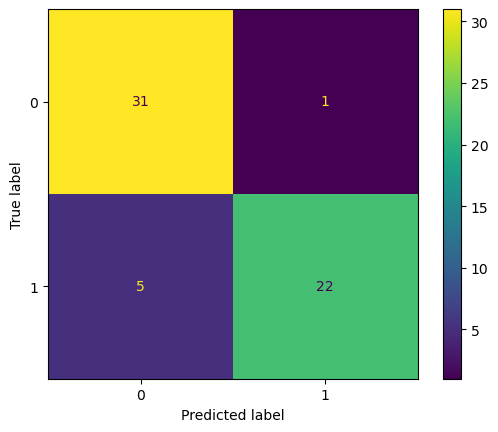

In [94]:
# Matriz de Confusión del modelo

cm = confusion_matrix(Y_test, Prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

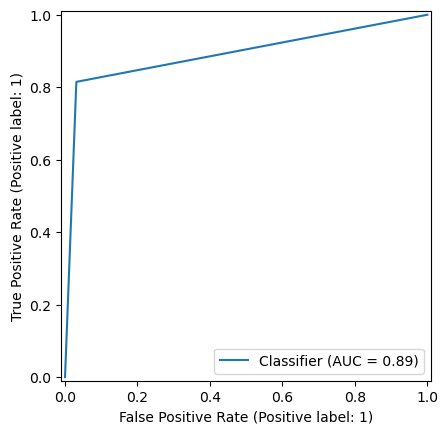

In [96]:
# Curva de Precision del Modelo (Curva ROC)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()